## Project 3 
# Learning the Topology of a Bayesian Network Using K2 Algorithm
### Advanced Statistics for Physical Analysis @ Physics of Data, UniPD - 29/7/2019

### `Alberto Chimenti - Paolo Frazzetto - Vincenzo Maria Schimmenti`

<a id='sources'></a>
Sources:
* [G.F.Cooper and E. Herskovits](https://link.springer.com/article/10.1007/BF00994110)
* [C. Ruiz](http://web.cs.wpi.edu/~cs539/s05/Projects/k2_algorithm.pdf)
* [A. Franzin et al.](https://cran.r-project.org/web/packages/bnstruct/vignettes/bnstruct.pdf)
* [`bnstruct`](https://github.com/sambofra/bnstruct)
* [`bnlearn`](http://www.bnlearn.com/)

## -- Theoretical introduction

A Byesian belief-network structure $B_s$ is a directed acyclic graph in which nodes represent domain variables and arcs between nodes represent probabilistic dependanceies. A variable in such a structure may be continuous or discrete. In the following approach we will consider the discrete case.
A BBN structure gives us informations about $\texttt{dependency relationships}$ among the nodes and can be used for $\texttt{probabilistic inference}$ over the system, providing a direct way to compute joint probabilities, given the conditional ones associated with the graph's arcs. Since the joint probability of a given instantiation of the system variables can be computed as:
$$P(X_1,X_2,...,X_n)=\prod_{i=1}^{n}P(X_{i}|\pi_{i})$$
where $\pi_{i}$ are the "parent" nodes of the variable $x_{i}$

Using a Bayesian approach such a network can be constructed starting from a database which presents several records of the values combination of the system variables.
One can find the most probable belief-network structure, given the dataset.

Let $\textbf{D}$ be a dataset of cases (records), $\textbf{Z}$ be the set of variables represented by D, $B_{S_{i}}$ and $B_{S_{j}}$ be two b-n structures containing the variables that are in Z. By computing $\frac{P(B_{S_{i}}|D)}{P(B_{S_{j}}|D)}$ for pairs of b-n structures one can rank order a set of structures by their posterior probabilities.
We can easly prove that:
$$\frac{P(B_{S_{i}}|D)}{P(B_{S_{j}}|D)}=\frac{P(B_{S_{i}},D)}{P(B_{S_{j}},D)}\;\;\;\;\;\;\;\;\; (1)$$
and therefore compute $P(B_{S_{i}},D)$ instead of the conditional probabilities.

***

Formally:

##### Theorem

Let Z be a set of n variables, where a variable $x_i$ in Z has $r_i$ possible value assignments: ($\nu_{i_1}$,...,$\nu_{i_{ri}}$). Let D be a database of m cases, where each case contains a value assignment for each variable in Z. Each variable $x_i$ in $B_{S}$ has a set of parents, which we represent with a list of variables $\pi_{i}$. Let $w_{ij}$ denote jth unique instantiation of $\pi_{i}$, relative to D. Suppose there are $q_i$ such unique instantiations of $\pi_{i}$. Define $N_{ijk}$ to be the number of cases in D in which variable $x_i$ has the value $\nu_{ik}$ and $\pi_{i}$ is instantiated as $w_{ij}$. Let
$$N_{ij}=\sum_{k=1}^{r_{i}}N_{ijk}$$


Suppose the following assumptions hold:

1. The database variables in Z are discrete.
2. Cases occur indipendently, given a bilief-network structure.
3. There are no cases that have variables with missing values.
4. Before observing D, we are indifferent regarding which numerical probabilities to assign to the belief network with structure $B_S$.

It follows that:

$$P(B_{S},D)=P(B_{S})\prod_{i=1}^{n}\prod_{j=1}^{q_{i}}\frac{(r_{i}-1)!}{(N_{ij}+r_{i}-1)!}\prod_{k=1}^{r_{i}}N_{ijk}!\;\;\;\;\;\;\;\;\; (2)$$

The proof is reported in the appendix of [G.F.Cooper and E. Herskovits](#sources) paper.

***
### Most probable belief-network structure: framework and assumptions overview

The aim here is to find, given a dataset D, the most probable b-n structure, i.e. finding the structure $B_S$ which maximizes the conditional probability $P(B_S|D)$.
Using equation (1) we can say that $P(B_S|D)\propto P(B_S, D)$ and therefore, finding the structure which maximizes $P(B_S|D)$ is the same as finding the one that maximizes $P(B_S,D)$.

##### - Equal Priors Assumption
In order to simplify the optimization problem of equation (2), [G.F.Cooper and E. Herskovits](#sources) assume that the prior probabilities $P(B_S)$ is the same for all structures, yielding:
$$max_{B_S}[P(B_{S},D)]=c\prod_{i=1}^{n}max_{\pi_{i}}\Big[\prod_{j=1}^{q_{i}}\frac{(r_{i}-1)!}{(N_{ij}+r_{i}-1)}\prod_{k=1}^{r_{i}}N_{ijk}!\Big]\;\;\;\;\;\;\;\;\; (3)$$

***

It is worth underlining a recursive equation found by Robinson (1977) which gives the number of possible structures that contain n nodes:
$$f(n)=\sum_{i=1}^{n}(-1)^{i+1}{n\choose i}2^{i(n-1)}f(n-i)$$
which leads to $4.2*10^{18}$ structures for $n=10$.


***
In order to simplify the calculations some further assumptions are introduced:

#### - Ordering Assumption
A good solution for the problem just exposed is proposed by [G.F.Cooper and E. Herskovits](#sources) in their paper.
They assume that one can specify an ordering for the n variables, such that, if $x_i$ precedes $x_j$ in the ordering then it is not allowed to have structures in which there is an arc from $x_j$ to $x_i$. Thus there are only $2^{n\choose 2}$ remaining possible structures.

#### - Maximum Number of Parents
To reduce the computational cost needed a maximum number of parents for each node should be imposed.


***
### Greedy Search Method: K2 Algorithm

The `K2 Algorithm` gives a computationally optimized way to search for the most probable structure.

Instead of maximizing the probability over all structures, one assumes that a node has no parents and incrementally adds that parent whose addition most increases the probability of the resulting structure.

Therefore one computes the scoring function:
$$g(i,\pi_i)=\prod_{j=1}^{q_{i}}\frac{(r_{i}-1)!}{(N_{ij}+r_{i}-1)}\prod_{k=1}^{r_{i}}N_{ijk}!\;\;\;\;\;\;\;\;\; (4)$$
where $\pi_i$ is the set of parents for node i which, following the given ordering, is composed by all the variables candidate to be parents of the $i$th one. 
One incrementally adds one parent node to $\pi_i$ at each iteration and if $g(i,\pi_i')>g(i,\pi_i)$ the node is permanently added to the parents and the structure probability $g(i,\pi_i)$ is updated.

## -- Our Implementation

### Import and Update Packages

In [ ]:
## Import and Update Packages# Install the required packages 

#install.packages('bnstruct', repo="https://cran.stat.unipd.it/")
#install.packages('bnlearn', repo="https://cran.stat.unipd.it/")

In [ ]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install()

#BiocManager::install(c("graph", "Rgraphviz"))

In [ ]:
#update.packages(ask = FALSE) # uncomment to update all

In [1]:
# Load libraries
library('bnstruct')
library('bnlearn')
library('Rcpp')
library('dplyr') 
library('ggplot2')
library('ggpubr')
theme_set(theme_pubclean())

Loading required package: bitops
Loading required package: Matrix
Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘bnlearn’

The following objects are masked from ‘package:bnstruct’:

    impute, read.bif, read.dsc, read.net, shd, write.dsc

The following objects are masked from ‘package:igraph’:

    compare, degree, path, subgraph

The following object is masked from ‘package:stats’:

    sigma


Attaching package: ‘dplyr’

The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: magrittr


***
## `Rcpp`

The computationally expensive part of the algorithm is the counting of different instances of variables in the dataset. Given the value $k$ of the variable $i$ of cardinality $r_i$ we are looking at, its (candidate) parents $\pi_i=(\pi_{i1},\dots, \pi_{iM})$ and their cardinality $r_{\pi_{i1}}, \dots, r_{\pi_{iM}}$, we would need to distinguish and count $q_i=\prod_{l=1}^M r_{\pi_{il}}$ possible types of rows in the dataset in order to compute $N_{ijk}$; this would require a relatively trivial mapping from the values of the variables and the configuration index $j=1\dots q_i$ and different _for loops_ which are not "native" in R, i.e. they are executed at runtime, not compiled so are slower: this problem is not visible for small datasets or few variables like in our application but can be a limitation in more compicated cases.  This is the main reason we chose to exploit Rcpp, a set of C++ libraries that makes the C++ code compatible with R (i.e. it exposes to C++ data types such as IntegerMatrix or NumericVector for R matrices and vectors) and compiles it (using `sourceCpp` below) into R executables. However our implementation can be easily brought back to pure R code, since it doesn't require special C++ external libraries.

The main problem, however, with the algorithm was the computation of factorials of large numbers (needed for the computation of the score function): even the Stiriling approximation breaks down for $170!$ which corresponds in the cases we tested to a breakdown of the algorithm at a dataset size of approximately $150$. Even using the logarithm of the score function to rank the predicted parents for a node has the same issues. To circumvent this problem we decided to avoid the usage of the full dataset and we implement a k2 algorithm splitting the dataset into reasonable size subsets. This results in different predicted network structures with different scores for which we decided to implement two ways of getting the final network, i.e. getting the one with the best score or a weighted version of all of the resulting network; calling $f_s$ the score of the network obtained from the $s$-th split of the dataset with adjacency matrix $A^{(s)}_{ij}$, we output a weighted matrix as:
$$W_{ij} = \frac{1}{\sum_s f_s} \sum_{s} f_s A_{ij}^{(s)}$$

In [2]:
# import the C++ script
cmpRes <- sourceCpp("rk2alg.cpp")
cmpRes

$functions
[1] "k2procedure" "condProb"   

$modules
character(0)

$cppSourcePath
[1] "/home/vicio/Scrivania/Exam/rk2alg.cpp"

$buildDirectory
[1] "/tmp/RtmpBVQbA3/sourceCpp-x86_64-pc-linux-gnu-1.0.1/sourcecpp_5169626874f8"

The Rcpp signature for the exposed methods are:

`SEXP k2procedure(SEXP x,SEXP dims, SEXP varOrder, int u =-1,int returnType = 0, int verbose = 0, int splitSize=100)`

This method is the main of the implementation; runs the k2 algorthm on a dataset `x` whose variable dimensions are denoted by `dims`. The parameter `u` is the maximum number of parents; `verbose` is an option to make outputs to the user during the code run; `splitSize` is used to split the data into subsets which are necessary to a successful learning, since k2 suffers from exploding factorials; `returnType` is the type of output desired: `0` stands for a simple adjacency list of the best learn network, `1` for its corresponding adjacency matrix and `2` for a weighted adjancecy matrix summarizing all the learn networks.


`NumericMatrix condProb(int i, IntegerMatrix x,IntegerVector dims, IntegerVector parents, int method = 0)`

Thi method outputs the conditional probabilities for a node `i` with at least one parent. If one uses `method=0` the probabilities are the empirical ones while for `method=1` they are the k2 model ones defined as:
$$\mathbb{E}[P[x_i=v_{ik}|\pi_i=w_{ij}]]=\mathbb{E}[\theta_{ijk}]=\frac{N_{ijk}+1}{N_{ij}+r_i}$$

***
### Load Datasets

Load the basic dataset used in the handout _Illustration of the K2 Algorithm for Learning Bayes Net Structures_ by Prof. Carolina Ruiz, whose correct topolgy is 
$$x_1 \rightarrow x_2 \rightarrow x_3$$


In [3]:
data.ruiz <- matrix(c(1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0), 10,3, byrow=T)
col.ruiz <- c("x1","x2","x3")
colnames(data.ruiz) <- col.ruiz
data.ruiz

x1,x2,x3
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1
0,0,0


Alternatively, load the toy dataset _Asia_ contained in the _bnstruct_ library.
This dataset originally appeared in the paper _Local Computations with Probabilities on Graphical Structures and Their Application to Expert Systems_ by S. L. Lauritzen and D. J. Spiegelhalter (1988) and it addresses the following scenario:

>Shortness-of-breath (dyspnoea) may be due to tuberculosis, lung cancer or
 bronchitis, or none of them, or more than one of them. A recent visit to Asia
 increases the chances of tuberculosis, while smoking is known to be a risk factor
 for both lung cancer and bronchitis. The results of a single chest X-ray do not
 discriminate between lung cancer and tuberculosis, as neither does the presence
 or absence of dyspnoea.

The structure of our knowledge-base is represented by the below directed graph:
![title](Asia.png)

In [4]:
df <- asia() # load it as BNDataset
bn.dataset <- asia() 
print(df)
layers <- c(1,2,1,2,2,3,4,4)


Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0


In [5]:
head(raw.data(df),10) # display the first raws

V1,V2,V3,V4,V5,V6,V7,V8
2,2,1,1,1,2,1,2
2,1,1,1,1,1,2,1
1,1,2,1,1,1,2,1
2,1,2,1,1,1,2,1
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,1


In [6]:
# convert BNDataset as regular dataframe for bnlearn
df.bnlearn <- as.data.frame(raw.data(df))
cols <- variables(df)
colnames(df.bnlearn) <- cols
df.bnlearn <- data.frame(sapply(df.bnlearn, as.factor)) # convert integer to factor 
str(df.bnlearn)

'data.frame':	10000 obs. of  8 variables:
 $ Asia        : Factor w/ 2 levels "1","2": 2 2 1 2 2 2 2 2 2 2 ...
 $ Tubercolosys: Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ Smoke       : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ LungCancer  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Bronchitis  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Either      : Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ X.ray       : Factor w/ 2 levels "1","2": 1 2 2 2 1 2 2 1 1 2 ...
 $ Dyspnea     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 2 1 ...


#### Skimming the dataset

In [7]:
df.plot <- as.data.frame(apply(df.bnlearn,2, table))
df.plot <- stack(df.plot)
df.plot <- cbind(df.plot, rep(c(0,1),8))
df.plot <- df.plot[,c(2,3,1)]
colnames(df.plot) = c("Var","Value", "Freq")
df.plot

Var,Value,Freq
<fct>,<dbl>,<int>
Asia,0,4953
Asia,1,5047
Tubercolosys,0,9438
Tubercolosys,1,562
Smoke,0,5419
Smoke,1,4581
LungCancer,0,9908
LungCancer,1,92
Bronchitis,0,9884


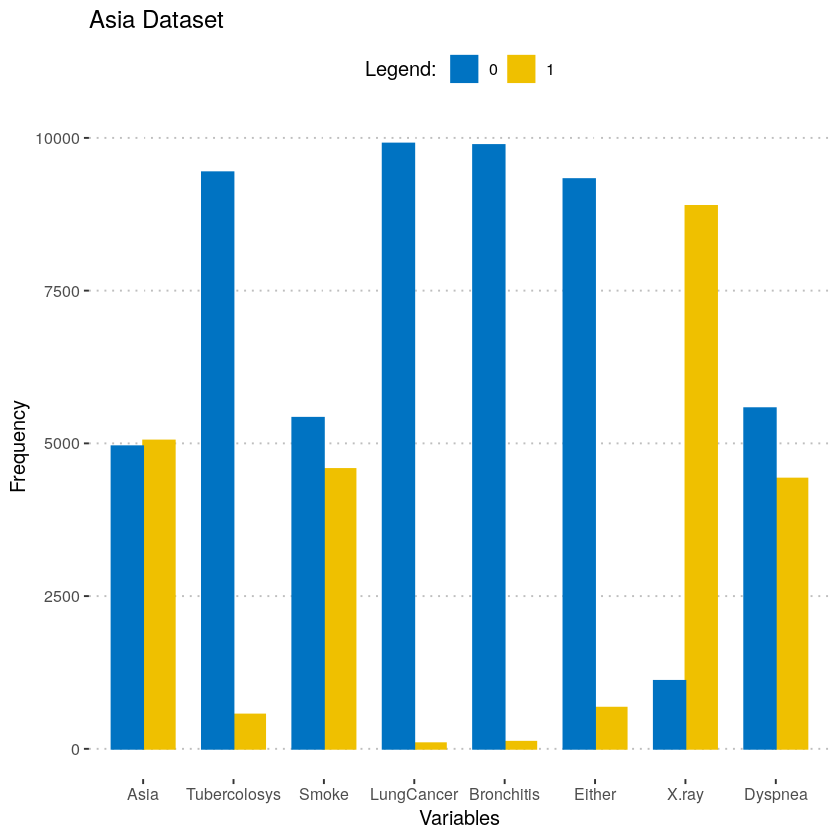

In [8]:
# plot frequencies for each variable
plot <- ggplot(df.plot, aes(x = Var, y = Freq)) +
        geom_col(aes(color = factor(Value), fill = factor(Value)), position = position_dodge(), width = 0.7) +
        scale_color_manual("Legend:",values = c("#0073C2FF", "#EFC000FF")) +  scale_fill_manual("Legend:",values = c("#0073C2FF", "#EFC000FF")) + 
        labs(x = "Variables", y = "Frequency", title = "Asia Dataset")
plot

corrplot 0.84 loaded


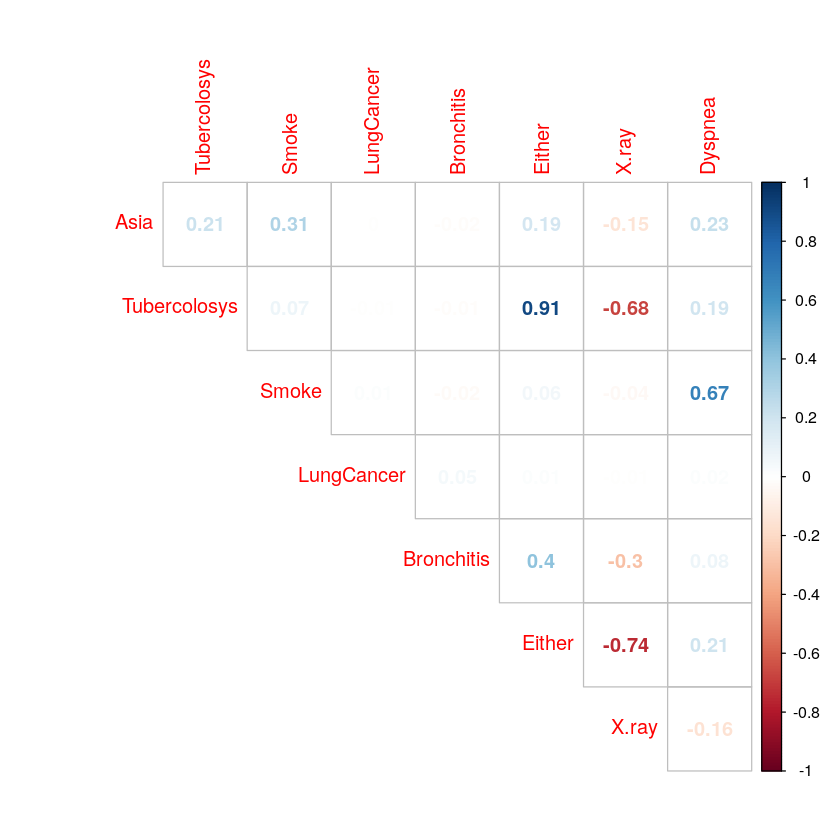

In [9]:
# Show correlation matrix
library('corrplot')
df.corr <- data.frame(sapply(df.bnlearn, as.integer))-1
corrplot(cor(df.corr), method='number', type='upper', diag = FALSE)

Loading required namespace: Rgraphviz


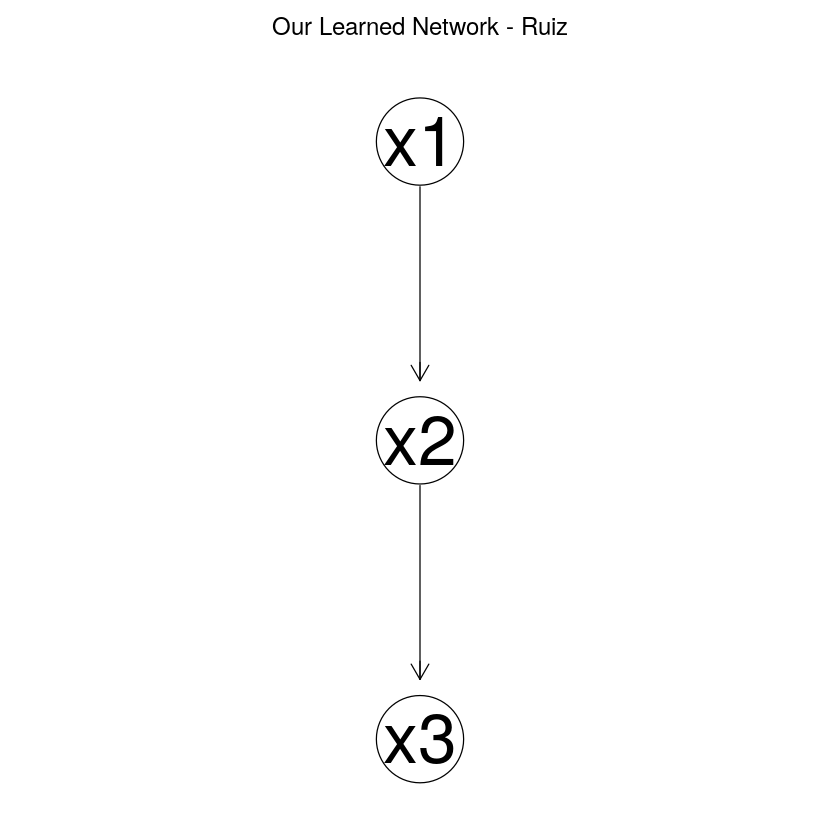

In [10]:
# Learn Ruiz's dataset
order <- c(0,1,2)  
r <- c(2,2,2)
mode(data.ruiz) <- "integer"

res <- k2procedure(data.ruiz,r,order,u=2,returnType=1)
res.adj <- unname(res)
our.net = empty.graph(col.ruiz)
amat(our.net) = res.adj
graphviz.plot(our.net, main = "Our Learned Network - Ruiz")

In [11]:
cat('Different predicted probabilities for x2 given x0 and x1: (1) empirical and (2) model')
condProb(2, data.ruiz, r, c(0,1),0)
condProb(2, data.ruiz, r, c(0,1),1)

Different predicted probabilities for x2 given x0 and x1: (1) empirical and (2) model

cond. x0,cond. x1,x2,P
0,0,0,0.75
0,0,1,0.25
0,1,0,0.00
0,1,1,1.00
1,0,0,1.00
1,0,1,0.00
1,1,0,0.00
1,1,1,1.00


cond. x0,cond. x1,x2,P
0,0,0,0.8000000
0,0,1,0.2000000
0,1,0,0.6666667
0,1,1,0.3333333
1,0,0,0.5000000
1,0,1,0.5000000
1,1,0,0.1666667
1,1,1,0.8333333


In [12]:
# --- Asia Dataset ---
# Preprocess the dataset
X <- as.matrix(asia)
n <- dim(X)[2]
m <- dim(X)[1]
X[X=='yes']=1
X[X=='no']=0
X <- matrix(as.integer(as.character(X)), m, n)
order <- c(0,2,1,3,4,5,6,7) # 0Asia 1Tubercolosys 2Smoke 3LungCancer 4Bronchitis 5Either 6X-ray 7Dyspnea
r <- rep(2, 8)
# Run our impementation of the k2 algorithm
randomize=F
if(randomize)
{
    X <- X[sample(1:m),]
}
res <- k2procedure(X,r,order, returnType=1, verbose=0,u=2,splitSize=50)
res # show learned adjacency matrix

,x0,x1,x2,x3,x4,x5,x6,x7
x0,0,0,0,1,0,1,1,0
x1,0,0,0,0,1,0,0,0
x2,0,0,0,1,0,0,1,1
x3,0,0,0,0,0,1,0,0
x4,0,0,0,0,0,0,0,1
x5,0,0,0,0,0,0,0,0
x6,0,0,0,0,0,0,0,0
x7,0,0,0,0,0,0,0,0


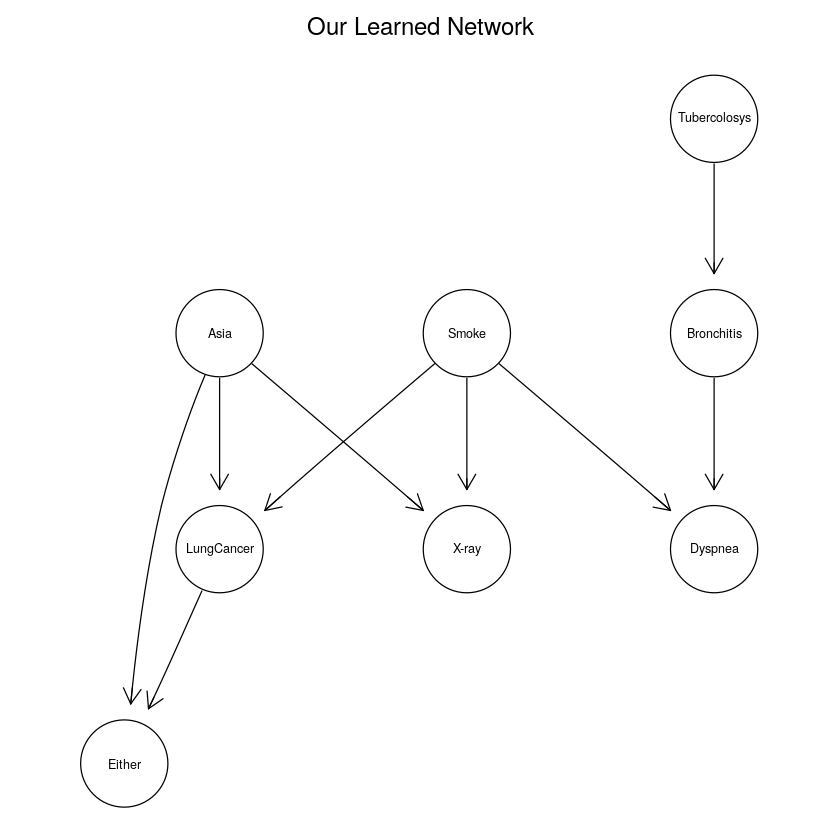

In [13]:
# plot our resulting network
res.adj <- unname(res)
our.net = empty.graph(cols)
amat(our.net) = res.adj
graphviz.plot(our.net, main = "Our Learned Network")


Bayesian Network: 

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE
node.sizes
0
WPDAG:
             Asia Tubercolosys    Smoke LungCancer Bronchitis    Either
Asia            0    14.866388 17.86246  16.261403  16.365158 16.744627
Tubercolosys    0     0.000000  0.00000   8.061195  14.757455  9.559887
Smoke           0     8.287991  0.00000   6.291574   7.067089  8.288946
LungCancer      0     0.000000  0.00000   0.000000   8.526974 12.022571
Bronchitis      0     0.000000  0.00000   0.000000   0.000000 12.963068
Either          0     0.000000  0.00000   0.000000   0.000000  0.000000
X-ray           0     0.000000  0.00000   0.000000   0.000000  0.000000
Dyspnea         0     0.000000  0.00000   0.000000   0.000000  0.000000
                 X-ray   Dyspnea
Asia         21.441778 22.384770
Tubercolosys 10.553677  6.122258
Smoke         7.291600 10.286726
LungCancer    9.029423  7.527154
Bronchitis    8.978341  6.487056
Eithe

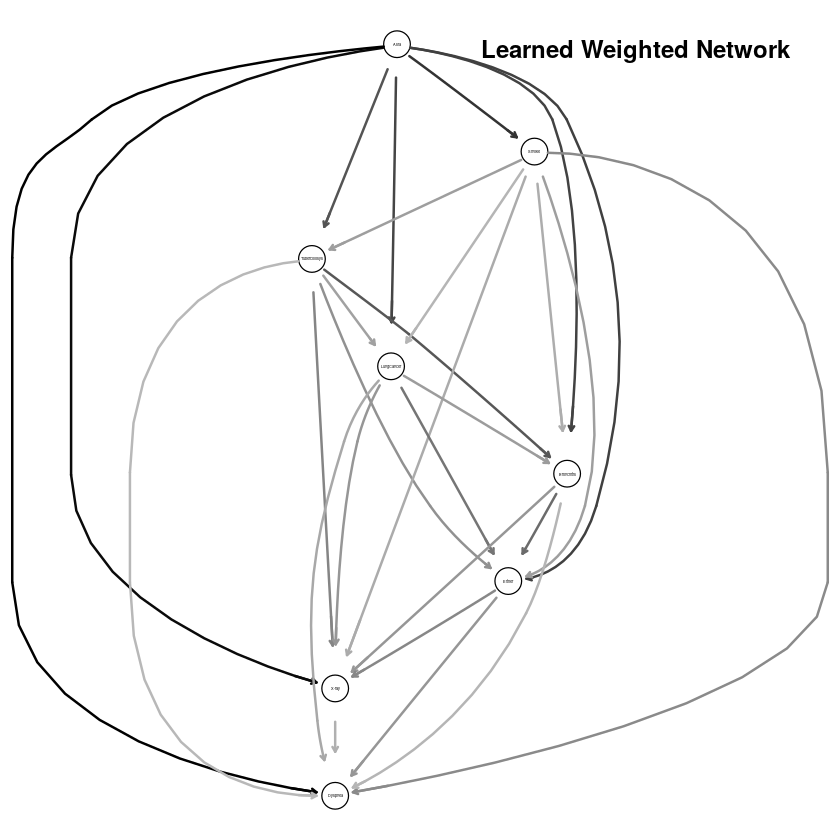

In [14]:
wadj <- k2procedure(X,r,order, returnType=2, verbose=0,u=2,splitSize=50)
e <- BN()
num.nodes(e) <- 8
variables(e) <- cols
wpdag(e) <- wadj
e
plot(e)
par(adj = 1)
title("Learned Weighted Network")

***
##  `bnstruct`

After having implemented and tested the K2 algorithm, we would like to investigate and compare our results with two R packages specifically designed for BBN. The first one is `bnstruct`:

In [15]:
citation("bnstruct")


To cite the bnstruct package in publications, use:

  Alberto Franzin, Francesco Sambo, Barbara di Camillo. bnstruct: an R
  package for Bayesian Network structure learning in the presence of
  missing data. Bioinformatics, 2017; 33 (8): 1250-1252, Oxford
  University Press

A BibTeX entry for LaTeX users is

  @Article{,
    title = {bnstruct: an R package for Bayesian Network structure learning in the presence of missing data},
    author = {Alberto Franzin and Francesco Sambo and Barbara di Camillo},
    journal = {Bioinformatics},
    year = {2017},
    volume = {33},
    number = {8},
    pages = {1250--1252},
    doi = {10.1093/bioinformatics/btw807},
    publisher = {Oxford University Press},
  }


We try to learn the _Asia_ database by employing all the possible algorithms and scoring functions provided in the package. In order to obtain more faithful results, the maximum number of parents is set to 2 and the layers of the nodes, i.e. their hierarchy, are given as input.

In [ ]:
# Network Learning
net.1 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "mmhc") # Max Min Hill Climbing (default)
net.2 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "mmpc") # Max-Min Parent-and-Children 
net.3 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BDeu") # Bayesian-Dirichlet equivalent uniform (default)
net.4 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "AIC") # Akaike Information Criterion
net.5 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BIC") # Bayesian Information Criterion
net.6 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "sm",   #  Silander-Myllymaki (exact search-and-score algorithm)
                        ) 

By means of the following functions, it is possible to further examine the learned-network class:

In [ ]:
dag(net.1) # Show Directed Acyclic Graph adjagency matrix

In [ ]:
cpts(net.1) # show conditional probability tables 

In [ ]:
print(net.1) # print all these results

In [ ]:
par(mfrow = c(3,2)) # plot the learned topologies
for (i in c(net.1,net.2,net.3,net.4,net.5,net.6)){
    plot(i)
    box(which = "figure")
}

Notice that just three algorithms yield to almost the right answer (the default Hill Climbing with BDeu or AIC and the Silander-Myllymaki exact search-and-score algorithm). Next, we improve an example taken from the package documentation that relies also on _bootsrapping_. Nevertheless, it cannot learn the correct topology (Smoke directly affects Dyspnea) but still it achieves fair better results than the previous ones.

In [ ]:
# bootstrap example taken from documentation, almost as wanted!
bn.boot <- bootstrap(bn.dataset, num.boots = 300)
net.bnstruct <- learn.network(bn.boot, bootstrap = TRUE, max.parents = 2, layering = layers, algo = "sm")
plot(net.bnstruct)

In [ ]:
wpdag(net.bnstruct) # print the WEIGHTED adjacency marix, based on the bootstrapped samples. 

Eventually, we favor the learning providing the actual network as starting point. However, the final result is still not totally correct due the apparently high influence of the _Smoke_ factor on the _Dyspnea_.

In [ ]:
actual.net <- matrix(c(0,1,0,0,0,0,0,0,
                       0,0,0,0,0,1,0,0,
                       0,0,0,1,1,0,0,0,
                       0,0,0,0,0,1,0,0,
                       0,0,0,0,0,0,0,1,
                       0,0,0,0,0,0,1,1,
                       0,0,0,0,0,0,0,0,
                       0,0,0,0,0,0,0,0), nrow = 8, ncol = 8, byrow = TRUE) # actual adjacency matrix 

In [ ]:
net.learned.actual <- learn.network(bn.dataset, initial.network = actual.net, max.parents = 2, layering = layers)
plot(net.learned.actual)

***
## `bnlearn`

We also take advange of the package `bnlearn` because it has its own implementation of the k2 algorithm that can be compared with our version.

In [16]:
citation("bnlearn")


To cite bnlearn in publications use the most appropriate among:

A teaching book about Bayesian networks based on bnlearn:

  Marco Scutari, Jean-Baptiste Denis. (2014) Bayesian Networks with
  Examples in R. Chapman and Hall, Boca Raton. ISBN 978-1-4822-2558-7.

To cite applications of Bayesian networks in genetics and systems
biology you may want to use:

  Radhakrishnan Nagarajan, Marco Scutari, Sophie Lebre. (2013) Bayesian
  Networks in R with Applications in Systems Biology. Springer, New
  York. ISBN 978-1-4614-6445-7.

To cite parallel computing for bnlearn in publications use:

  Marco Scutari (2017). Bayesian Network Constraint-Based Structure
  Learning Algorithms: Parallel and Optimized Implementations in the
  bnlearn R Package. Journal of Statistical Software, 77(2), 1-20.
  doi:10.18637/jss.v077.i02

To cite general use of bnlearn in publications use:

  Marco Scutari (2010). Learning Bayesian Networks with the bnlearn R
  Package. Journal of Statistical Software, 35(3)

In [17]:
bn.k2 <- hc(df.bnlearn, score = "k2") # learn network structure with K2 algorithm
bn.k2


  Bayesian network learned via Score-based methods

  model:
   [Tubercolosys][LungCancer][Bronchitis|LungCancer]
   [Either|Tubercolosys:Bronchitis][Dyspnea|Tubercolosys:Bronchitis]
   [Smoke|Tubercolosys:Bronchitis:Dyspnea][X.ray|Either]
   [Asia|Tubercolosys:Smoke]
  nodes:                                 8 
  arcs:                                  11 
    undirected arcs:                     0 
    directed arcs:                       11 
  average markov blanket size:           3.00 
  average neighbourhood size:            2.75 
  average branching factor:              1.38 

  learning algorithm:                    Hill-Climbing 
  score:                                 Cooper & Herskovits' K2 
  tests used in the learning procedure:  175 
  optimized:                             TRUE 


Again we used all the provided scoring functions. Notice that 4 of them (Bayesian Information Criterion, Bayesian Dirichlet equivalent, Bayesian Dirichlet sparse and modified Bayesian Dirichlet equivalent) learn the same structure , so even though is not totally correct, it is close the desired solution.

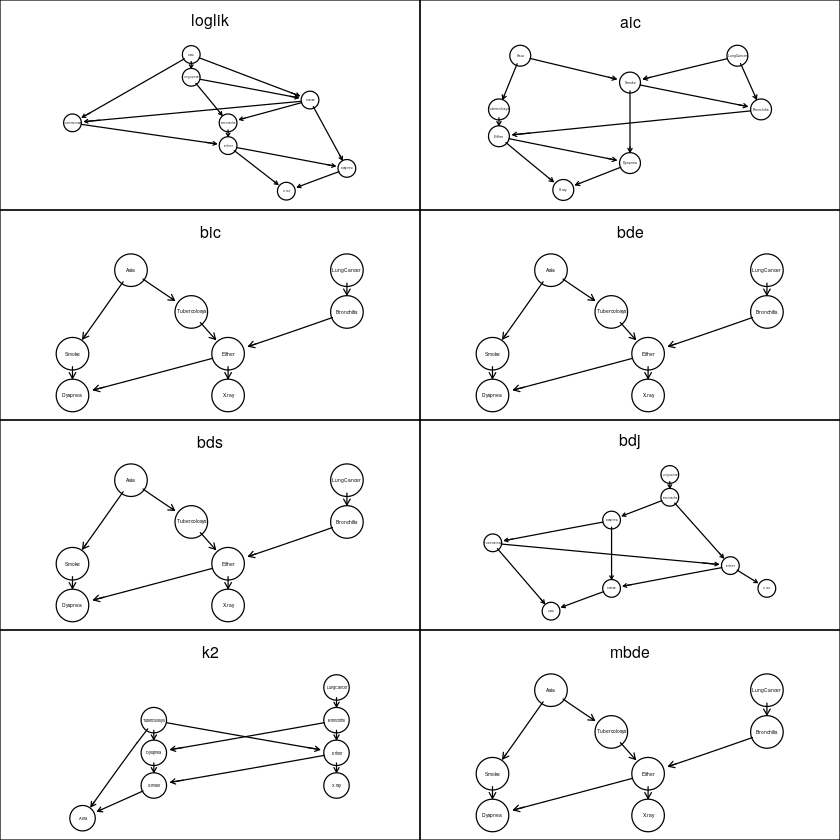

In [18]:
par(mfrow = c(4,2))
for (i in c("loglik","aic","bic","bde","bds","bdj","k2","mbde")) { # use k2 and all the possible algorithms
    graphviz.plot(hc(df.bnlearn, score = i, maxp = 2), main = i)
    box(which = "figure")
}

Once more, we initialise the learning with the actual network:

In [19]:
e = empty.graph(colnames(df.bnlearn))
amat(e) = actual.net
graphviz.plot(e, main = "Actual Network")

ERROR: Error in eval(expr, envir, enclos): oggetto "actual.net" non trovato


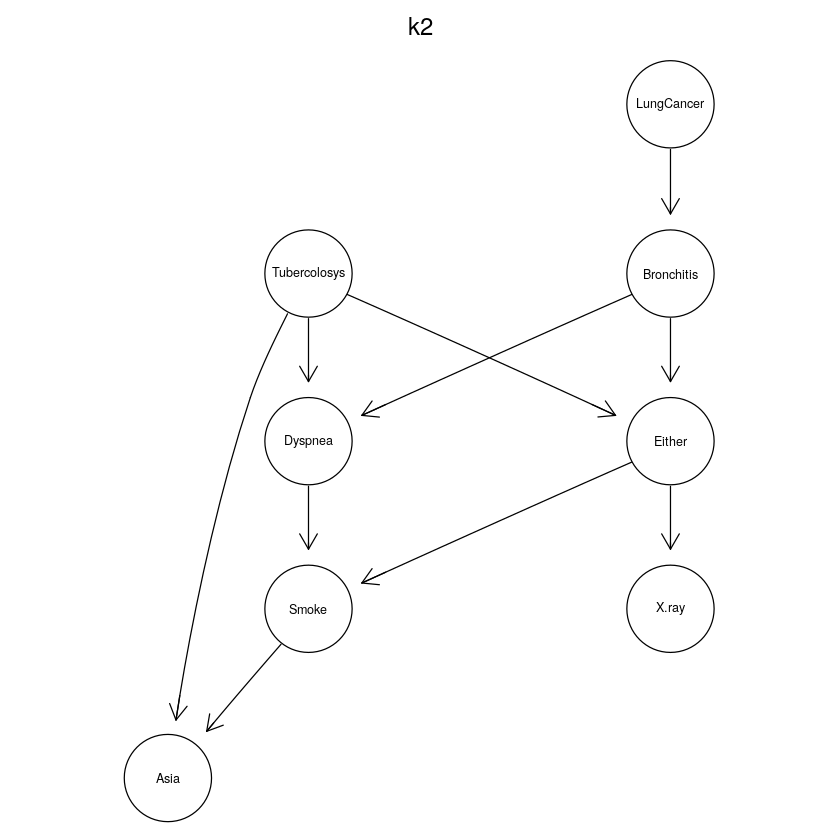

In [20]:
learned.hc <- hc(df.bnlearn, score = "k2", maxp = 2, start = e)
graphviz.plot(learned.hc, main = "k2")

***
## -- Conclusions

Our implementation of the K2 algorithm correctly predicts the example dataset used in [Ruiz](#sources). The results for the bigger dataset _Asia_ do not perfectly match the real solution but still neither _bnlearn_ and _bnstruct_ packages methods do. In all the three cases we can find reasonable insights from the predicted networks though.

The K2 algorithm, albeit being computationally cheap, suffers from the strong assumptions made in its very derivation; one can obtain very different results depending on the _prior_ choiche of the variable ordering. Such issues are less relevant for tasks for which one has previous insights about the variables causal relationships. Therefore we think it is valuable as a validation tool. To circumvent the aforementioned issues one can, after fixing in the variable set the one to be predicted, shuffle the ordering of the remaining variable and keeping either the network with the best overall score or a weighted average of all the predicted topologies. It is worth underlying that in general the problem of finding the maximum probability structure is not guaranteed to have a unique solution, since the full problem (i.e. no assumptions) is _NP_ hard.

In [ ]:
par(mfrow=c(2,2))
graphviz.plot(our.net, main = "Our Learned Network")
graphviz.plot(e, main = "Actual Network")
plot(net.learned.actual)
title("bnstruct", line = 3.2)
graphviz.plot(learned.hc, main = "bnlearn with k2")